<a href="https://colab.research.google.com/github/MendasD/CertificatIA_ForceN/blob/main/Projet_de_mentorat_FORCEN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Projet de mentorat commun du programme FORCEN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Chargement de la base données**

In [ ]:
# Importation des libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Chargement et affichage des 10 premières lignes du jeu de données
data = pd.read_csv('laptop_data.csv')
data.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [ ]:
# Affichage des 10 dernières lignes du jeu de données
data.tail(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1293,1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,47898.7200
1294,1294,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,29303.4672
1295,1295,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,42943.1472
1296,1296,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,11135.5200
1297,1297,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,38378.6496
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.3200


**Analyse de forme**

In [ ]:
# Dimension de la base
data.shape

(1303, 12)

Le résultat nous montre que notre jeu de données contient 1303 individus et 12 variables.

In [ ]:
# Types des variable
data.dtypes.value_counts()

,count
object,9
float64,2
int64,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Notre jeu de données contient 9 variables qualitatives, et 3 variables quantitaves, deux de types float et une de type int.On remarque également qu'il n'y a pas de données manquantes en se basant Non-null count.

**Analyse de fond**

In [ ]:
# Copie de la base
df=data.copy()

In [ ]:
df=df.drop(columns='Unnamed: 0', axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


On a remarqué que la variable weight était considérée comme une variable qualitative. Commme la vairiable weight représente le poids qui doit être de types quantitative on a jugé nécessaire de la transformer en float.

In [ ]:
df["Weight"] = df["Weight"].apply(lambda x : float(x[ : -2]))
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


On a remarqué que la variable Ram était considérée comme une variable qualitative. Commme la vairiable Ram représente la mémoire Ram qui doit être de types quantitative on a jugé nécessaire de la transformer en int.

In [ ]:
df["Ram"] = df["Ram"].apply(lambda x : int(x[ : -2]))
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200


In [ ]:
# Sélection des variables qualitatives
var_qual = df.select_dtypes(include="object").columns.tolist()
var_qual

['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [ ]:
# Sélection des variables quantitatives
var_quant = df.select_dtypes(include="number").columns.tolist()
var_quant

['Inches', 'Ram', 'Weight', 'Price']

In [ ]:
# Statistiques descriptives pour les variables qualitatives
df[var_qual].describe()

,Company,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
count,1303,1303,1303,1303,1303,1303,1303
unique,19,6,40,118,39,110,9
top,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,256GB SSD,Intel HD Graphics 620,Windows 10
freq,297,727,507,190,412,281,1072


D'aprs les résultats on remarque que pour Company on a 19 modalités et Dell est le mode.

In [ ]:
## Statistiques descriptives pour les variables quantitatives
df[var_quant].describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


Nous avons la moyenne, les quartiles, le min et le max

In [ ]:
# Lignes dupliquées
df.duplicated().sum()

29

On a remarqué que notre base contient 29 lignes dupliquées.

In [ ]:
# Suppression des lignes dupliquées
df.drop_duplicates(inplace=True)
# Vérification
df.duplicated().sum()

0

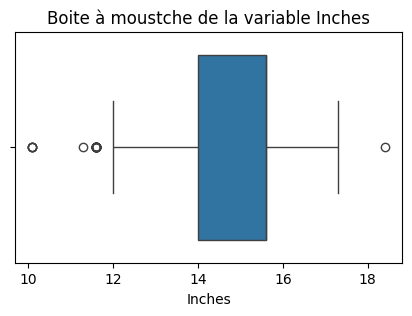

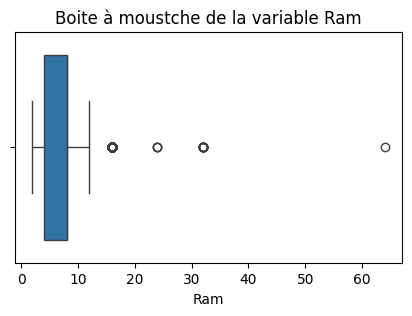

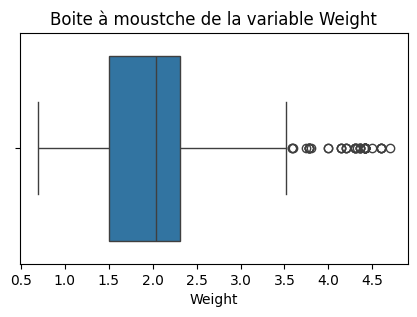

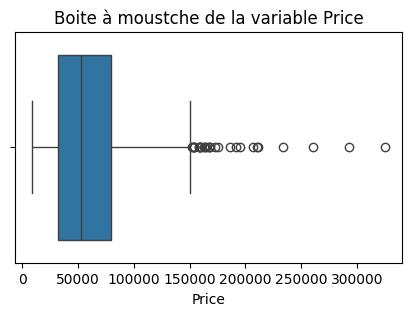

In [ ]:
# Boites à moustaches
for var in var_quant :
  plt.figure(figsize = (5,3))
  sns.boxplot(data = df , x = var)
  plt.title(f"Boite à moustche de la variable {var}")

# Corrélation entre les variables quantitaives

Mesure de la corrélation linéaire entre les variables quantitatives

Text(0.5, 1.0, 'Carte de corrélation linéaire')

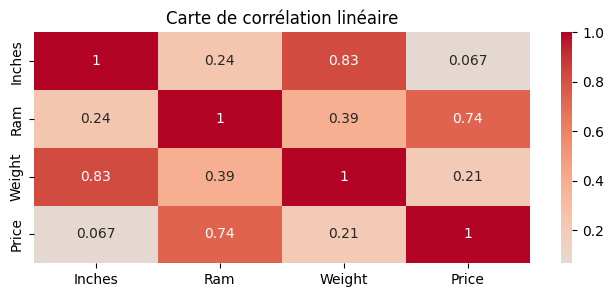

In [ ]:
# Vérification des corrélations entre les variables quantitatives
cor = df[var_quant].corr()
plt.figure(figsize = (8,3))
sns.heatmap(cor, annot=True, cmap='coolwarm', center=0)
plt.title(f"Carte de corrélation linéaire")

On observe en général une corrélation linéaire positives entre les variables. Les variables `price` et `Ram`sont fortement corrélées (r = 0,74). Il en est de même pour les variables `Weight` et `Inches` (r= 0,83).

Mesure d'autres types de corrélation

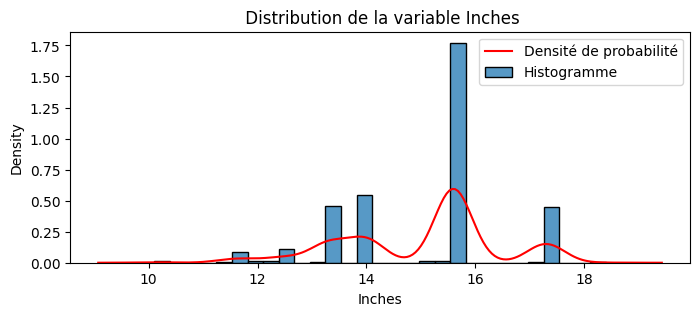

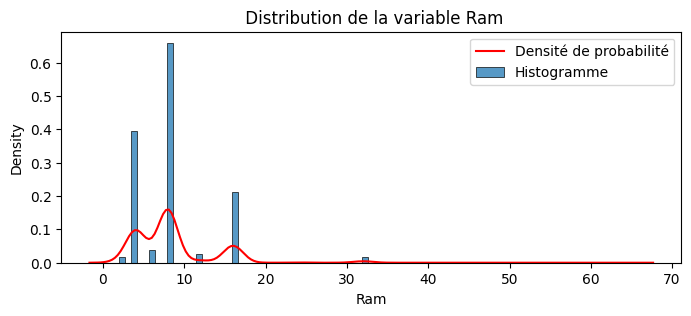

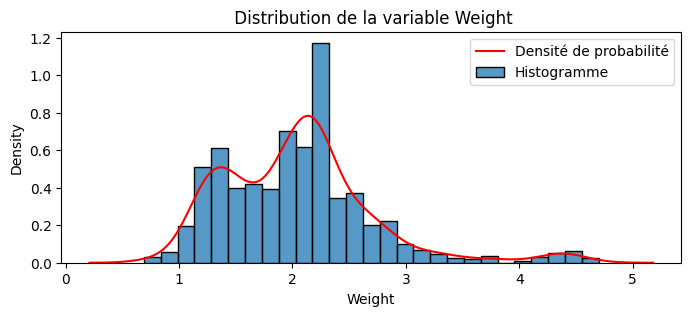

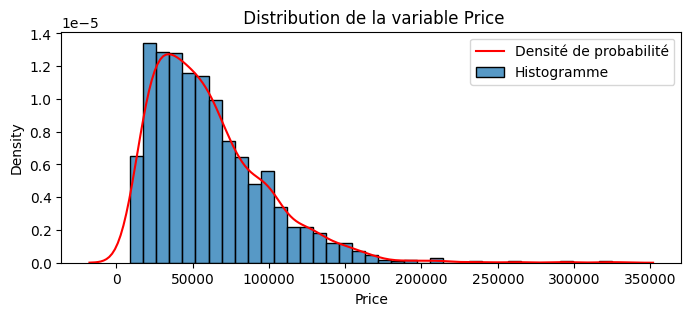

In [ ]:
# Distribution de variables quantitatives
for var in var_quant :
    plt.figure(figsize = (8,3))
    sns.histplot(data = df , x = var, stat = 'density' , label = 'Histogramme')
    sns.kdeplot(data = df , x = var , label = 'Densité de probabilité' , color = 'red')
    plt.title(f" Distribution de la variable {var}")
    plt.legend()

In [ ]:
from scipy.stats import boxcox
# Transformer les  distributions en distributions symétriques, sensiblement normales
for var in var_quant:
  df[f"{var}_boxcox"], lambda_value = boxcox(df[var])
  print(f"Lambda value for {var}: {lambda_value}")

Lambda value for Inches: 2.6537277500889465
Lambda value for Ram: -0.18533435259065725
Lambda value for Weight: 0.012475740239392222
Lambda value for Price: 0.1183934392976319


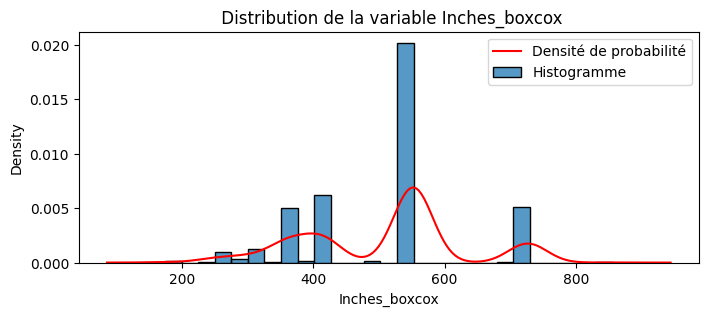

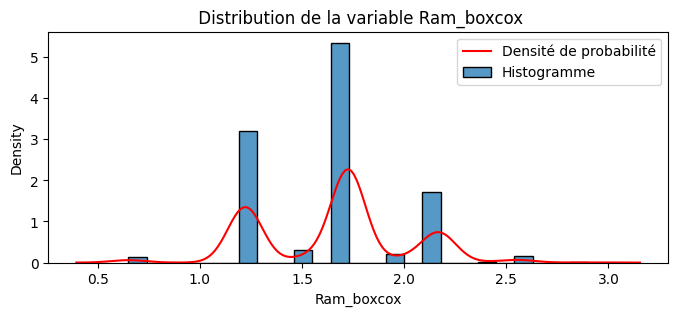

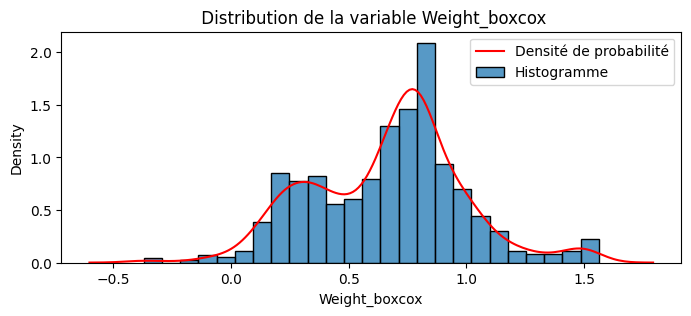

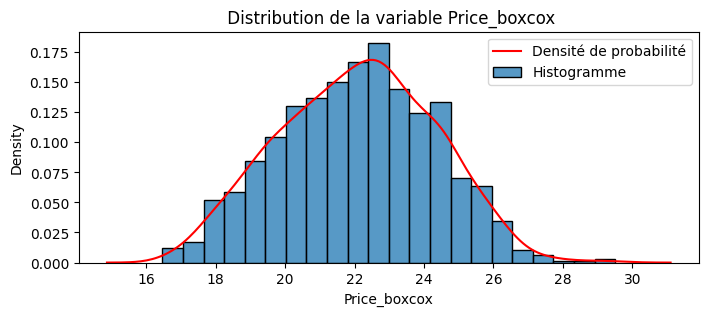

In [ ]:
# Distribution de variables quantitatives
for var in var_quant :
    plt.figure(figsize = (8,3))
    sns.histplot(data = df , x = f'{var}_boxcox', stat = 'density' , label = 'Histogramme')
    sns.kdeplot(data = df , x = f'{var}_boxcox' , label = 'Densité de probabilité' , color = 'red')
    plt.title(f" Distribution de la variable {var}_boxcox")
    plt.legend()

Tests

In [ ]:
# Test de Sperman
from scipy.stats import spearmanr
results=[]
for var1 in var_quant :
  for var2 in var_quant :
    if var1 != var2 :
      corr, p_value= spearmanr(df[var1], df[var2])
      results.append([var1, var2, corr,p_value])
df_results = pd.DataFrame(results, columns=['variable 1', 'variable 2', 'statistique', 'p-value']).sort_values(by='statistique', ascending=False)
# Conserver leslignes d'incice impaires
df_results = df_results.iloc[1::2]
df_results

,variable 1,variable 2,statistique,p-value
6,Weight,Inches,0.879413,0.000000e+00
10,Price,Ram,0.763880,3.416644e-244
7,Weight,Ram,0.190271,7.522257e-12
3,Ram,Inches,0.154061,3.265674e-08
11,Price,Weight,-0.024697,3.784273e-01
9,Price,Inches,-0.048759,8.191536e-02


In [ ]:
# Test de pearson
from scipy.stats import pearsonr
results=[]
for var1 in var_quant :
  for var2 in var_quant :
    if var1 != var2 :
      corr, p_value= pearsonr(df[f'{var1}_boxcox'], df[f'{var2}_boxcox'])
      results.append([f'{var1}_boxcox', f'{var2}_boxcox', corr,p_value])
df_results = pd.DataFrame(results, columns=['variable 1', 'variable 2', 'statistique', 'p-value']).sort_values(by='statistique', ascending=False)
# Conserver leslignes d'incice impaires
df_results = df_results.iloc[1::2]
df_results

,variable 1,variable 2,statistique,p-value
6,Weight_boxcox,Inches_boxcox,0.881710,0.000000e+00
10,Price_boxcox,Ram_boxcox,0.774673,1.946148e-255
7,Weight_boxcox,Ram_boxcox,0.238766,5.660822e-18
3,Ram_boxcox,Inches_boxcox,0.225328,3.963837e-16
11,Price_boxcox,Weight_boxcox,0.061415,2.837841e-02
9,Price_boxcox,Inches_boxcox,0.053423,5.660953e-02


On remarque une faible corrélation entre la variable Price et Inches et on observe une forte corrélation entre weight et inches donc on pourra supprimer Inches.

In [ ]:
# Test de chi2
from scipy.stats import chi2_contingency
results=[]
for var1 in var_qual :
  for var2 in var_qual :
    if var1 != var2 :
      tab_de_cont = pd.crosstab(df[var1], df[var2])
      corr, p_value, dl, at= chi2_contingency(tab_de_cont)
      results.append([var1, var2, corr,p_value])

df_results = pd.DataFrame(results, columns=['variable 1', 'variable 2', 'statistique','p-value']).sort_values(by='statistique', ascending=False)
# Conserver leslignes d'incice impaires
df_results = df_results.iloc[1::2]
df_results

,variable 1,variable 2,statistique,p-value
33,Gpu,Cpu,49172.201952,0.000000e+00
14,ScreenResolution,Cpu,14978.089926,0.000000e+00
21,Cpu,Memory,12635.052730,0.000000e+00
16,ScreenResolution,Gpu,9658.401172,0.000000e+00
34,Gpu,Memory,7705.451533,3.393847e-218
1,Company,ScreenResolution,6645.139495,0.000000e+00
18,Cpu,Company,6434.033191,0.000000e+00
23,Cpu,OpSys,5058.154203,0.000000e+00
26,Memory,ScreenResolution,4522.646069,4.294426e-304
30,Gpu,Company,4061.486776,1.443351e-148


In [ ]:
#Test de kruskal
from scipy.stats import kruskal
results=[]
tmp1=[]
for var1 in var_qual :
  tmp1=df[var1].unique()
  group = []
  for x in tmp1 :
    group_x = df[df[var1]==x]["Price"]
    group.append(group_x)
  corr, p_value = kruskal(*group)
  results.append([var1, 'Price', corr,p_value])
df_results = pd.DataFrame(results, columns=['variable 1', 'variable 2', 'statistique','p-value']).sort_values(by='statistique', ascending=False)
# Conserver leslignes d'incice impaires
#df_results = df_results.iloc[1::2]
df_results

,variable 1,variable 2,statistique,p-value
3,Cpu,Price,906.410287,3.038804e-122
4,Memory,Price,777.429768,1.025240e-138
5,Gpu,Price,733.008656,3.798417e-93
2,ScreenResolution,Price,559.957333,1.842183e-93
1,TypeName,Price,544.846077,1.658809e-115
0,Company,Price,220.463726,7.802650e-37
6,OpSys,Price,184.931007,9.477525e-36


In [ ]:
# test de kruskall avec les var qual et le prix
from scipy.stats import kruskal
results=[]
modalites = []
for var in var_qual :
  modalites = df[var].unique()
  groupes = []
  for modalite in modalites:
    groupes.append(df[df[var] == modalite]['Price'])
  corr, p_value= kruskal(*groupes)
  results.append([var, 'price',corr,p_value])

df_results = pd.DataFrame(results, columns=['variable 1', 'variable 2', 'statistique','p-value']).sort_values(by='statistique', ascending=False)
df_results

,variable 1,variable 2,statistique,p-value
3,Cpu,price,906.410287,3.038804e-122
4,Memory,price,777.429768,1.025240e-138
5,Gpu,price,733.008656,3.798417e-93
2,ScreenResolution,price,559.957333,1.842183e-93
1,TypeName,price,544.846077,1.658809e-115
0,Company,price,220.463726,7.802650e-37
6,OpSys,price,184.931007,9.477525e-36


## Prétraitement

In [ ]:
# Copie de la base actuelle
df2 = df.copy()

In [ ]:
# Encodage
for var in var_qual:
  df2[f"{var}_encoded"] = df2[var].astype("category").cat.codes

df2

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,...,Ram_boxcox,Weight_boxcox,Price_boxcox,Company_encoded,TypeName_encoded,ScreenResolution_encoded,Cpu_encoded,Memory_encoded,Gpu_encoded,OpSys_encoded
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,...,1.725616,0.315430,23.271384,1,4,23,65,4,58,8
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,...,1.725616,0.293205,21.807988,1,4,1,63,2,51,8
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,...,1.725616,0.622985,20.249021,7,3,8,74,16,53,4
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,...,2.168057,0.606600,25.762916,1,4,25,85,29,9,8
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,...,1.725616,0.315430,24.407860,1,4,23,67,16,59,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,...,1.222526,0.792348,21.024833,2,3,0,89,26,65,5
1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,...,1.222526,0.589947,20.604420,10,0,13,89,4,47,5
1271,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,...,2.168057,0.262794,23.696135,10,0,19,89,29,47,5
1272,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,...,0.650472,0.406492,17.285689,10,3,0,34,35,40,5


In [ ]:
# Types des variables
df2.dtypes

,0
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,int64
Memory,object
Gpu,object
OpSys,object
Weight,float64


In [ ]:
X= df2.drop(columns="Price",axis=1).select_dtypes(include="number")
Y= df2["Price"]
X.drop(columns=[var for var in X.columns if var.endswith("boxcox")], axis=1, inplace=True)
X.columns

Index(['Inches', 'Ram', 'Weight', 'Company_encoded', 'TypeName_encoded',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Memory_encoded',
       'Gpu_encoded', 'OpSys_encoded'],
      dtype='object')

In [ ]:
# On scinde nos données pour le test et l'entraînement
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1019, 10), (255, 10), (1019,), (255,))

### Modèle 1

In [ ]:
# Instanciation du modèle
model = LinearRegression()
#Entraînement du modèle
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#Prédictions
Y_pred = model.predict(X_test)
Y_pred

array([ 30945.0977672 ,  30221.55822275,  70122.04610397,  55423.60790246,
        60489.50408794,  38328.10901215,  77072.67983137,  36223.3168774 ,
        50582.95621768,  42950.64020021,  50321.90839508, 135556.55235683,
        57470.88729236,  66421.09209237,  55942.37959563,  61123.59933256,
        78768.3708125 ,  79414.12293961,  71387.33882648,  24989.97889826,
        59358.08145876,  38305.18684408,  58291.90779639,  54956.11454953,
        63533.38227888,  57475.58423081,  95146.59876185, 303413.50979095,
        61370.84189758,  59992.26874085,  58032.75994323,  89914.55947654,
        58675.89491561,  49589.03683897,  73269.47049153,  58994.18795751,
        75785.78733242,  55629.01657221,  64635.05094639,  19176.30571464,
       171412.22199392,  71455.67158118,  61452.10705779,  96600.99363677,
        72071.52929982,  60638.46011551,  60849.7451694 ,  45265.33450362,
        68993.76813112,  94155.63687489,  83562.28684842,  66253.95627425,
        44474.83212652,  

In [ ]:
# Performance du modèle
r2_score = model.score(X_test,Y_test)
mse = mean_squared_error(Y_test,Y_pred)
print(f"R2 score : {r2_score}")
print(f"MSE : {mse}")


R2 score : 0.6592230348222046
MSE : 583980243.4521947


## Amélioration du modèle

### Utilisation des valeurs normalisées (modèle 2)

In [ ]:
# Utilisation des valeurs normalisées
X= df2.drop(columns=["Price","Price_boxcox"],axis=1).select_dtypes(include="number")
X.drop(columns=[var[:-7] for var in X.columns if var.endswith("boxcox")], axis=1, inplace=True)
X.columns

Index(['Inches_boxcox', 'Ram_boxcox', 'Weight_boxcox', 'Company_encoded',
       'TypeName_encoded', 'ScreenResolution_encoded', 'Cpu_encoded',
       'Memory_encoded', 'Gpu_encoded', 'OpSys_encoded'],
      dtype='object')

In [ ]:
# Separation des données
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
# Instanciation du modèle
modele = LinearRegression()
#Entraînement du modèle
modele.fit(X_train,Y_train)

LinearRegression()

In [ ]:
# Prédictions
Y_pred = modele.predict(X_test)
Y_pred

array([28332.6645592 , 32025.71305748, 77947.94233848, ...,
       69533.17830207, 68914.15761709, 26799.23846976])

In [ ]:
# Performance du modèle
r2_score = modele.score(X_test,Y_test)
mse = mean_squared_error(Y_test,Y_pred)
print(f"R2 score : {r2_score}")
print(f"MSE : {mse}")


R2 score : 0.5862753361619047
MSE : 542040122.5963534


### Suppression de certaines variables correlées dans le premier modèle (modèle 3)

Text(0.5, 1.0, 'Carte de corrélation linéaire')

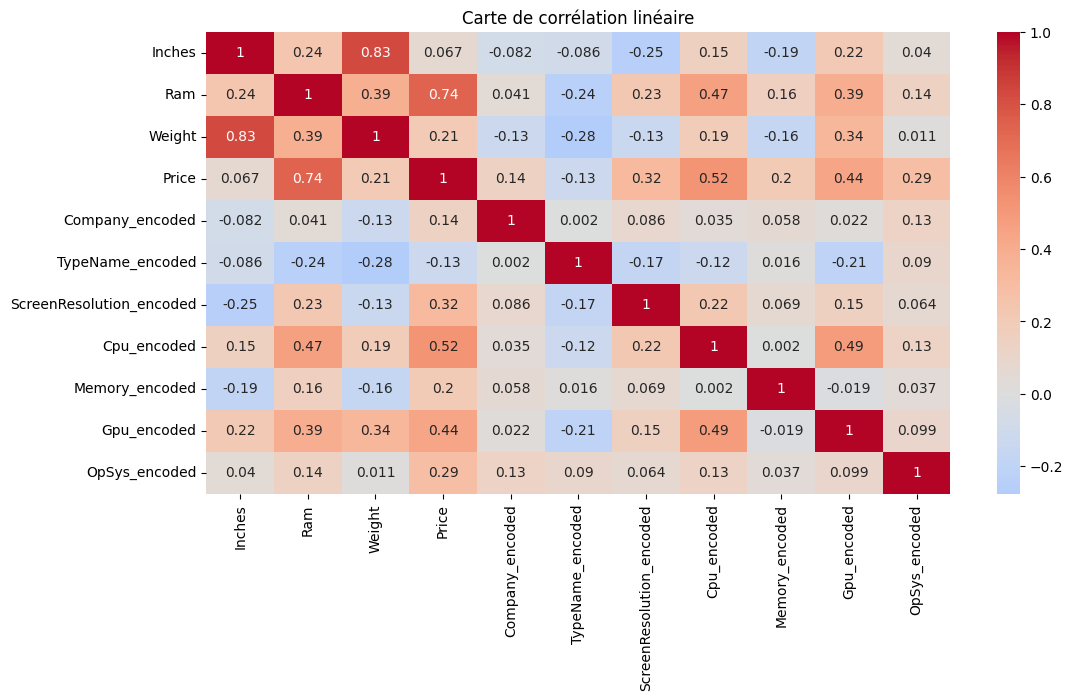

In [ ]:
# Matrice de correlation
var_quant2 = var_quant
for var in var_qual:
  var_quant2.append(f"{var}_encoded")

plt.figure(figsize = (12,6))
sns.heatmap(df2[var_quant2].corr(), annot=True, cmap='coolwarm', center=0)
plt.title(f"Carte de corrélation linéaire")


In [ ]:
# On reprend le modèle en éliminant la variable Weight
X= df2[var_quant2].drop(["Price","Weight"],axis=1)
Y= df2["Price"]
X.columns



Index(['Inches', 'Ram', 'Company_encoded', 'TypeName_encoded',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Memory_encoded',
       'Gpu_encoded', 'OpSys_encoded'],
      dtype='object')

In [ ]:
X_test,X_train,Y_test,Y_train = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
modele = LinearRegression()
modele.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = modele.predict(X_test)
Y_pred

array([35361.49805953, 28743.00901713, 74278.19851159, ...,
       63701.34096828, 60465.08959997, 40628.67541733])

In [ ]:
r2_score = modele.score(X_test,Y_test)
mse = mean_squared_error(Y_test,Y_pred)
print(f"R2 score : {r2_score}")
print(f"MSE : {mse}")

R2 score : 0.6413372402967301
MSE : 469900934.6863256


### Standardisons les données en centrant puis en réduisant (modèle 4)

In [ ]:
variables = df2.select_dtypes(include="number").drop(columns = [var for var in df2.columns if var.endswith("boxcox")],axis=1).columns.tolist()
variables

['Inches',
 'Ram',
 'Weight',
 'Price',
 'Company_encoded',
 'TypeName_encoded',
 'ScreenResolution_encoded',
 'Cpu_encoded',
 'Memory_encoded',
 'Gpu_encoded',
 'OpSys_encoded']

In [ ]:
df_test = df2[variables]
df_test.head(2)

,Inches,Ram,Weight,Price,Company_encoded,TypeName_encoded,ScreenResolution_encoded,Cpu_encoded,Memory_encoded,Gpu_encoded,OpSys_encoded
0,13.3,8,1.37,71378.6832,1,4,23,65,4,58,8
1,13.3,8,1.34,47895.5232,1,4,1,63,2,51,8


In [ ]:
df_test = df_test.apply(lambda x : (x-x.mean())/x.std(), axis=0)
df_test.head(2)

,Inches,Ram,Weight,Price,Company_encoded,TypeName_encoded,ScreenResolution_encoded,Cpu_encoded,Memory_encoded,Gpu_encoded,OpSys_encoded
0,-1.204561,-0.087141,-1.001429,0.291309,-1.333976,1.135556,1.736401,-0.496839,-1.547894,0.142217,3.079144
1,-1.204561,-0.087141,-1.046242,-0.337706,-1.333976,1.135556,-1.056910,-0.576982,-1.799974,-0.180750,3.079144


In [ ]:
X = df_test.drop(columns="Price",axis=1)
Y = df_test["Price"]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
Y_pred = model.predict(X_test)


In [ ]:
r2_score = model.score(X_test,Y_test)
mse = mean_squared_error(Y_test,Y_pred)
print(f"R2 score : {r2_score}")
print(f"MSE : {mse}")

R2 score : 0.6592230348222048
MSE : 0.4189934042788795


### Regression Lasso (modèle 5)

In [ ]:
from sklearn.linear_model import LassoCV

# Générer des valeurs possibles pour le paramètre alpha
alphas = [0.1, 0.01, 0.001,0.0001, 1, 10]

# Lasso avec validation croisée
lasso_cv = LassoCV(alphas=alphas, cv=5)  # 5-fold cross-validation (méthode de validation croisée pour évaluer la performance de notre modèle tout en réduisant les risques de surapprentissage (overfitting) et de sous-apprentissage (underfitting))
lasso_cv.fit(X_train, Y_train)

# Meilleur alpha trouvé
best_alpha = lasso_cv.alpha_
print(f"Meilleur alpha : {best_alpha}")


Meilleur alpha : 0.0001


In [ ]:
from sklearn.linear_model import Lasso
# Instanciation du modèle
model = Lasso(alpha=0.0001)
#Entraînement du modèle
model.fit(X_train,Y_train)

Lasso(alpha=0.0001)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
r2_score = model.score(X_test,Y_test)
mse = mean_squared_error(Y_test,Y_pred)

print(f"Slope : {slope:.2f}")
print(f"Intercept : {intercept:.2f}")
print(f"R2 score : {r2_score}")
print(f"MSE : {mse}")

Slope : -0.16
Intercept : -0.00
R2 score : 0.6591643188432625
MSE : 0.4190655969750311


### Utilisation des modèles **SVR**


Nous commencerons par déterminer les meilleurs valeurs pour les paramètres de notre modèle

In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir le pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', SVR())
])

# Définir la grille de paramètres
param_grid = {
    'regressor__C': [0.1, 1, 10],          # Valeurs possibles pour C
    'regressor__epsilon': [0.01, 0.1, 0.5], # Valeurs possibles pour epsilon
    'regressor__kernel': ['linear', 'rbf']  # Tester différents noyaux
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Résultats
print("Meilleure configuration :", grid_search.best_params_)
print("Meilleur score (MSE négatif) :", grid_search.best_score_)


Meilleure configuration : {'regressor__C': 1, 'regressor__epsilon': 0.1, 'regressor__kernel': 'rbf'}
Meilleur score (MSE négatif) : -0.2360787417874322


Modèle **SVR** en utilisant *StandardScaler* pour la standardisation des données (**modèle 6**)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Créer le pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Standardisation des données
 ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # Modèle SVR avec noyau RBF
])

# Ajuster le pipeline sur les données d'entraînement
pipeline.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
Y_pred = pipeline.predict(X_test)

# Évaluer le modèle
r2_score = pipeline.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2_score}")



Mean Squared Error: 0.4160458252635978
R2 Score: 0.6616203685777998


Modèle **SVR** en utilisant ***RobustScaler*** pour la standardisation des données (**modèle 7**)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Créer le pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),       # Standardisation des données
 ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # Modèle SVR avec noyau RBF
])

# Ajuster le pipeline sur les données d'entraînement
pipeline.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
Y_pred = pipeline.predict(X_test)

# Évaluer le modèle
r2_score = pipeline.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2_score}")

Mean Squared Error: 0.39803192988266717
R2 Score: 0.676271483693822


Modèle **SVR** en utilisant ***MinMaxScaler*** pour la standardisation des données (**modèle 8**)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

# Créer le pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Standardisation des données
 ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))  # Modèle SVR avec noyau RBF
])

# Ajuster le pipeline sur les données d'entraînement
pipeline.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
Y_pred = pipeline.predict(X_test)

# Évaluer le modèle
r2_score = pipeline.score(X_test, Y_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2_score}")

Mean Squared Error: 0.38343250346373015
R2 Score: 0.6881455327303323


**Remarque:** En observant les performances des différents modèles réalisés (à travers le *R2_score* et le *MSE*), on s'aperçoit que le **modèle 8 est le plus performant.**